In [2]:
import numpy as np
import matplotlib.pyplot as plt

STARTER ALGORITHM - G-H FILTER (PSEUDO-CODE)

In this starter code, we provide a basic implementation of the g-h filter algorithm. This implementation estimates the position and velocity of an object based on noisy measurements. The g-h filter is a simple yet effective method for tracking objects in one-dimensional space. The algorithm takes in a series of measurements, initial estimates for position and velocity, gain parameters (g and h), and the time step (dt). It iteratively updates the position and velocity estimates based on the measurements and the specified gains.

In [3]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est  = np.zeros(N)
    v_est  = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1]*dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt

    return x_est, v_est

### Question 1

In this question, we will implement the g-h filter algorithm to estimate the position and velocity of an object based on noisy measurements. We will generate synthetic data for a moving object, apply the g-h filter, and evaluate its performance using Root Mean Square Error (RMSE) and Mean Absolute Innovation (MAI) metrics.

With this question we are analyzing the g-h filter's ability to how affect the filter's performance changing the gain parameters g and h. We are starting the analysis with g=1 and h=0.1 values. Lookking at the RMSE and MAI values g and h parameters have to be tuned for more accurate results. Only changing h values does not affect the RMSE and MAI values significantly. So, g parameter has more effect on the filter performance. Changing g value 1 to 0.7 and keeping h same 0.1 gives better results. Keep trying to find the best g values checking RMSE and MAI values. 0.22 g value gives the best results for this specific case without changing the h values. After finding the best g value, changing h value to 0.05 gives slightly better results. So, for this specific case the best g and h values are 0.22 and 0.05 respectively.

Conclusion: In g-h filter, we observe that the gain parameter g has a more significant impact on the first estimation accuracy compared to h. By tuning g, we can effectively reduce the RMSE and MAI, leading to improved filter performance. While h does contribute to the overall estimation, its influence is less pronounced than that of g. Therefore, careful selection of g is crucial for optimizing the g-h filter's performance in tracking applications.

RMSE: 0.956
MAI: 1.935


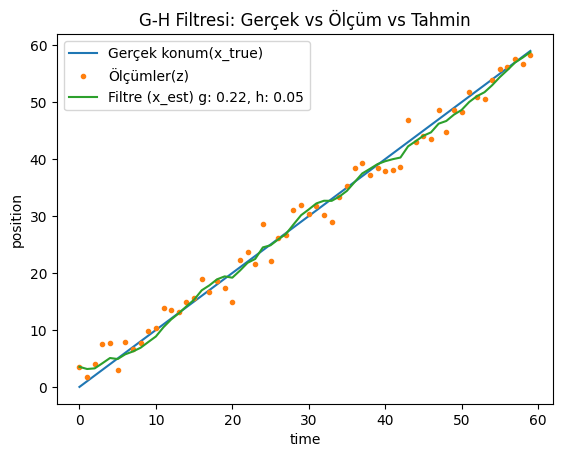

In [133]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est  = np.zeros(N)
    v_est  = np.zeros(N)
    x_pred_series = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0
    x_pred_series[0] = x0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1]*dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt

        x_pred_series[k] = x_pred

    return x_est, v_est, x_pred_series

np.random.seed(0)
N = 60
dt = 1.0
x0_true, v_true = 0.0, 1.0
t = np.arange(N) * dt
x_true = x0_true + v_true * t
sigma = 2.0
z = x_true + np.random.normal(0, sigma, size=N)
x0, v0 = z[0], 0.0

g, h = 0.22, 0.05
x_est, v_est, x_pred = gh_filters(z, x0, v0, g, h, dt)

rmse = np.sqrt(np.mean((x_est - x_true)**2))

mai = np.mean(np.abs(z[1:] - x_pred[1:]))

print(f"RMSE: {rmse:.3f}")
print(f"MAI: {mai:.3f}")

plt.figure()
plt.plot(t, x_true, label="Gerçek konum(x_true)")
plt.plot(t, z, ".", label="Ölçümler(z)")
plt.plot(t, x_est, label=f"Filtre (x_est) g: {g}, h: {h}")
plt.xlabel("time")
plt.ylabel("position")
plt.title("G-H Filtresi: Gerçek vs Ölçüm vs Tahmin")
plt.legend()
plt.show()

### Question 2

In this question, we will investigate the impact of initial conditions on the performance of the g-h filter. We will compare the filter's performance with good and bad initial guesses for position and velocity. The goal is to observe how the choice of initial conditions affects the filter's ability to converge to the true state of the system. Plotting the results will help visualize the differences in performance.

With this question we are going to analyze the effect of g and h to the bad initial guess situation. In the first part of the question, we are using g=0.22 and h=0.05 values which are the best values we found in Question 1. In this case, if we start with the same g and h values, the filter is able to converge to the true state even with a bad initial guess but it takes more time compared to the good initial guess case. The RMSE and MAI values are also 40x higher than the good initial guess case. We are starting with the changing g values first to see if we can improve the performance. If we decrease the g value it gives us more oscillations. After this observation we are going to increase the g value to see if it improves the performance. Increasing g value to 1 gives us better results compared to the previous bad initial guess case but still the RMSE and MAI values are significantly higher than the good initial guess case. After these observations we are starting to change the h values to see if it improves the performance. Decreasing h value to 0.0001 gives us slightly better results but still the RMSE and MAI values are significantly higher than the good initial guess case.

Conclusion: In g-h filter, while the gain parameters g and h influence the filter's responsiveness, they cannot fully compensate for poor initial conditions. A bad initial guess can lead to significantly higher RMSE and MAI values, indicating that the filter struggles to converge accurately to the true state. Although tuning g and h can improve performance to some extent, starting with accurate initial estimates remains crucial for optimal filter performance. In this g-h filters if we have bad initial conditions, starting with the g values close to 1 helps the filter to converge faster but still the performance is not as good as the good initial condition case. After finding the best g value, decreasing h value helps to improve the performance slightly.

Good RMSE:  0.9557460517334719
Good MAI:  1.9347874180266593
Bad RMSE:  25.903199991566055
Bad MAI:  5.645877545713657


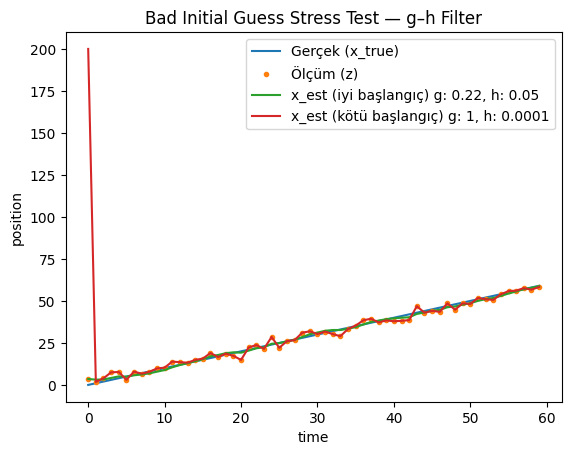

In [134]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est  = np.zeros(N)
    v_est  = np.zeros(N)
    x_pred_series = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0
    x_pred_series[0] = x0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1] * dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt

        x_pred_series[k] = x_pred

    return x_est, v_est, x_pred_series

np.random.seed(0)
N = 60
dt = 1.0
x0_true, v_true = 0.0, 1.0
t = np.arange(N) * dt
x_true = x0_true + v_true * t
sigma = 2.0
z = x_true + np.random.normal(0, sigma, size=N)

g_good, h_good = 0.22, 0.05

# 1) İyi başlangıç
x0_good, v0_good = z[0], 0.0
x_est_g, v_est_g, x_pred_g = gh_filters(z, x0_good, v0_good, g_good, h_good, dt)

g_bad, h_bad = 1, 0.0001

# 2) Kötü başlangıç (stress): büyük ofset
x0_bad, v0_bad = 200.0, 0.0
x_est_b, v_est_b, x_pred_b = gh_filters(z, x0_bad, v0_bad, g_bad, h_bad, dt)

def rmse(a,b):
    return np.sqrt(np.mean((a - b)**2))

def mai(z, x_pred):
    return np.mean(np.abs(z[1:] - x_pred[1:]))

print(f"Good RMSE: ", rmse(x_est_g, x_true))
print(f"Good MAI: ", mai(z,x_pred_g))
print("Bad RMSE: ", rmse(x_est_b, x_true))
print("Bad MAI: ", mai(z,x_pred_b))

plt.figure()
plt.plot(t, x_true, label="Gerçek (x_true)")
plt.plot(t, z, ".", label="Ölçüm (z)", alpha=1)
plt.plot(t, x_est_g, label=f"x_est (iyi başlangıç) g: {g_good}, h: {h_good}")
plt.plot(t, x_est_b, label=f"x_est (kötü başlangıç) g: {g_bad}, h: {h_bad}")
plt.xlabel("time")
plt.ylabel("position")
plt.title("Bad Initial Guess Stress Test — g–h Filter")
plt.legend(); plt.show()

### Question 3

In this question, we will explore the effect of measurement noise on the performance of the g-h filter. We will run the filter with different levels of measurement noise (sigma_z) and tune the gain parameter g to minimize the RMSE for each noise level. The goal is to observe how the optimal g value changes with increasing noise and how it affects the filter's ability to estimate the true state of the system. We will plot the results for different noise levels to visualize the filter's performance.

In this case, we are analyzing the effect of measurement noise on the g-h filter performance. We are running the filter for two different noise levels: light noise (sigma_z=10) and heavy noise (sigma_z=100). For each noise level, we are tuning the g parameter to find the best value that minimizes the RMSE. 2. Question we analyze the h value and it gives us the best results in the bad initial condition case. So, in this noisy case we have to keep the h value as low as possible to get better results. We are keeping the h value fixed at 0.0001 for both noise levels. In this analysis, we are going to use g_grid which contains values from 0.01 to 0.80 with 80 different values. This helps us to find the best g values without trying manually.

Conclusion: In g-h filter, as the measurement noise increases, the optimal gain parameter g tends to decrease. This adjustment helps the filter to be less responsive to noisy measurements, thereby improving its estimation accuracy. The analysis shows that for light noise (sigma_z=10), a higher g value is optimal, while for heavy noise (sigma_z=100), a lower g value is preferred. This trend highlights the importance of tuning the gain parameters based on the noise characteristics of the measurements to achieve the best filter performance.

sigma_z=  10.0  ->  best g=0.23,  RMSE=4.772
sigma_z= 100.0  ->  best g=0.03,  RMSE=15.812


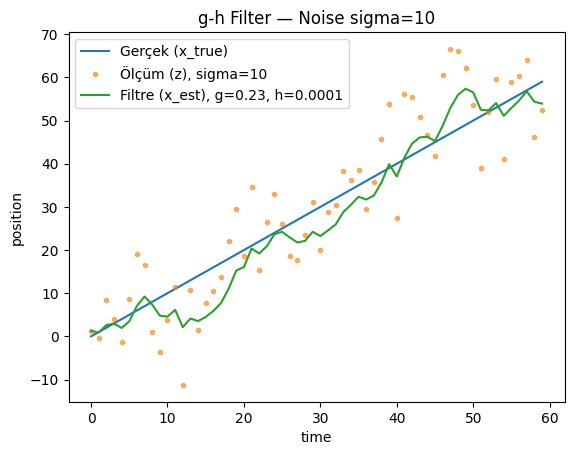

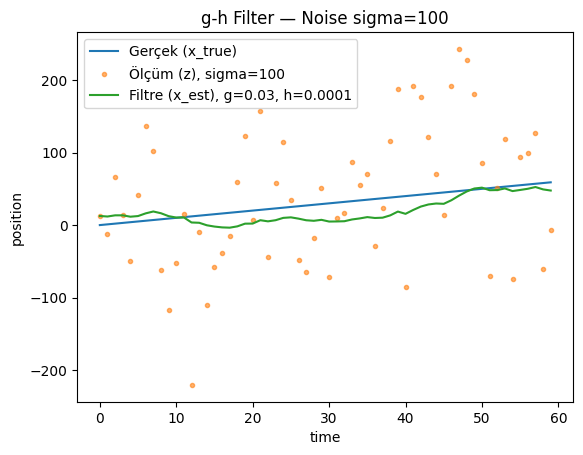

In [135]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est  = np.zeros(N)
    v_est  = np.zeros(N)
    x_pred_series = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0
    x_pred_series[0] = x0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1]*dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt

        x_pred_series[k] = x_pred

    return x_est, v_est, x_pred_series

N = 60
dt = 1.0
x0_true, v_true = 0.0, 1.0
t = np.arange(N) * dt
x_true = x0_true + v_true * t

g_grid = np.linspace(0.01, 0.80, 80)
h_fixed = 0.0001

def run_case(sigma_z, g_candidates=g_grid, h=h_fixed, seed=0):
    rng = np.random.default_rng(seed)
    # Aynı true yörüngeyi koruyup sadece ölçüm gürültüsünü değiştiriyoruz
    z = x_true + rng.normal(0, sigma_z, size=N)

    # g'yi tune et: aynı gürültü serisi üzerinde tüm g'leri dene
    best_rmse, best_g, best_x_est, best_x_pred = np.inf, None, None, None
    for gg in g_candidates:
        x_est, v_est, x_pred = gh_filters(z, x0=z[0], v0=0.0, g=gg, h=h, dt=dt)
        rmse = np.sqrt(np.mean((x_est - x_true) ** 2))
        if rmse < best_rmse:
            best_rmse, best_g, best_x_est, best_x_pred = rmse, gg, x_est, x_pred

    return {
        "sigma": sigma_z,
        "g": best_g,
        "rmse": best_rmse,
        "z": z,
        "x_est": best_x_est,
        "x_pred": best_x_pred,
    }

results = []
for sigma in [10.0, 100.0]:
    res = run_case(sigma_z=sigma, seed=0)
    results.append(res)
    print(f"sigma_z={sigma:>6.1f}  ->  best g={res['g']:.2f},  RMSE={res['rmse']:.3f}")

for res in results:
    plt.figure()
    plt.plot(t, x_true, label="Gerçek (x_true)")
    plt.plot(t, res["z"], ".", alpha=0.6, label=f"Ölçüm (z), sigma={res['sigma']:.0f}")
    plt.plot(t, res["x_est"], label=f"Filtre (x_est), g={res['g']:.2f}, h={h_fixed}")
    plt.xlabel("time")
    plt.ylabel("position")
    plt.title(f"g-h Filter — Noise sigma={res['sigma']:.0f}")
    plt.legend()
    plt.show()

### Question 4

In this question, we will implement both the g-h filter and the g-h-k filter to estimate the position, velocity, and acceleration of an object undergoing constant acceleration. We will generate synthetic data for an accelerating object, apply both filters, and compare their performance using Root Mean Square Error (RMSE) metrics. The g-h-k filter is expected to perform better in this scenario due to its ability to account for acceleration in the state estimation.

In this case, we are starting to analyze the g-h and g-h-k filters' performance on an accelerating object. Without changing the g and h values we found in Question1, we are applying both filters to the same noisy measurements of an accelerating object. The optimizing the k value which is gamma in our implementation will gives us better results compared to the g-h filters. Bigger gamma values gives more trouble to the filter and it diverges, we need to keep it small to get better results. After trying different gamma values, we found that gamma=0.003 gives the best results for this specific case.

Conclusion: In the context of tracking an accelerating object, the g-h-k filter outperforms the g-h filter due to its ability to account for acceleration in the state estimation. By incorporating the acceleration term through the gamma parameter, the g-h-k filter provides a more accurate representation of the object's motion, leading to lower RMSE values. The analysis demonstrates that while both filters can estimate position and velocity, the inclusion of acceleration in the g-h-k filter significantly enhances its performance in scenarios involving non-constant velocity.

RMSE g-h   : 7.938
RMSE g-h-k : 3.306


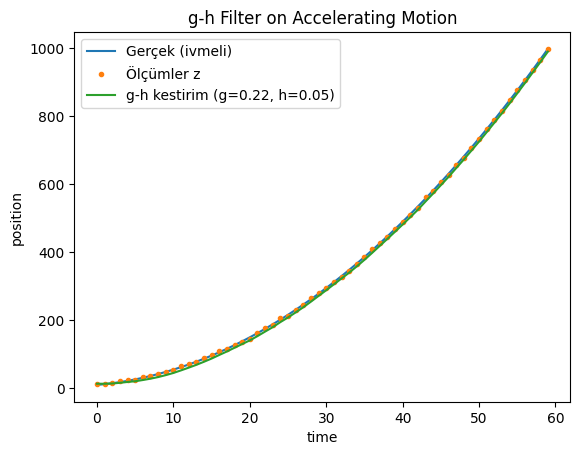

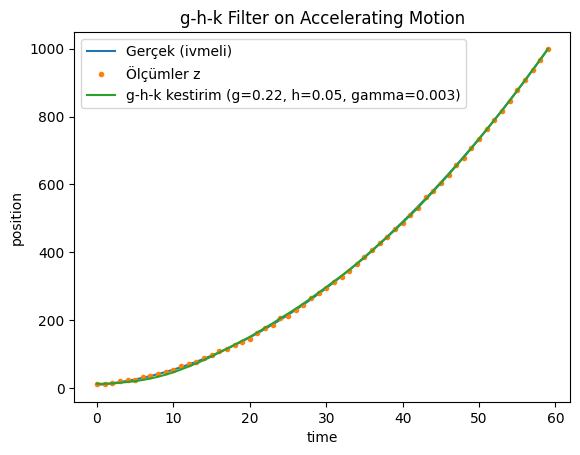

In [136]:
# ----------------------------
# g-h (alpha-beta) filter
# ----------------------------
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est = np.zeros(N)
    v_est = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1] * dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt
    return x_est, v_est

# ----------------------------
# g-h-k (alpha-beta-gamma) filter
# Constant acceleration model
# ----------------------------
def ghk_filter(z, x0, v0, a0, g, h, gamma, dt):
    N = len(z)

    x = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)

    x[0], v[0], a[0] = x0, v0, a0

    for k in range(1, N):

        x_pred = x[k-1] + v[k-1] * dt + 0.5 * a[k-1] * (dt**2)
        v_pred = v[k-1] + a[k-1] * dt
        a_pred = a[k-1]

        r = z[k] - x_pred

        x[k] = x_pred + g * r
        v[k] = v_pred + (h * r) / dt
        a[k] = a_pred + (2 * gamma * r) / (dt**2)
    return x, v, a

np.random.seed(0)
N = 60
dt = 1.0
t = np.arange(N)*dt

x0_true, v0_true, a_true = 10.0, 2.0, 0.5
x_true = x0_true + v0_true * t + 0.5 * a_true * (t**2)

sigma = 2.0
z = x_true + np.random.normal(0, sigma, size=N)

g, h = 0.22, 0.05
x_est_gh, v_est_gh = gh_filters(z, x0=z[0], v0=0.0, g=g, h=h, dt=dt)

gamma = 0.003
x_est_ghk, v_est_ghk, a_est_ghk = ghk_filter(z, x0=z[0], v0=0.0, a0=0.0,
                                             g=g, h=h, gamma=gamma, dt=dt)

rmse_gh  = np.sqrt(np.mean((x_est_gh  - x_true)**2))
rmse_ghk = np.sqrt(np.mean((x_est_ghk - x_true)**2))
print(f"RMSE g-h   : {rmse_gh:.3f}")
print(f"RMSE g-h-k : {rmse_ghk:.3f}")

# ----------------------------
# Graph 1: g-h
# ----------------------------
plt.figure()
plt.plot(t, x_true, label="Gerçek (ivmeli)")
plt.plot(t, z, ".", label="Ölçümler z")
plt.plot(t, x_est_gh, label=f"g-h kestirim (g={g}, h={h})")
plt.xlabel("time")
plt.ylabel("position")
plt.title("g-h Filter on Accelerating Motion")
plt.legend()
plt.show()

# ----------------------------
# Graph 2: g-h-k
# ----------------------------
plt.figure()
plt.plot(t, x_true, label="Gerçek (ivmeli)")
plt.plot(t, z, ".", label="Ölçümler z")
plt.plot(t, x_est_ghk, label=f"g-h-k kestirim (g={g}, h={h}, gamma={gamma})")
plt.xlabel("time")
plt.ylabel("position")
plt.title("g-h-k Filter on Accelerating Motion")
plt.legend()
plt.show()


### Question 5

In this question, we will analyze the effect of the gain parameter g on the performance of the g-h filter under different levels of measurement noise. We will run the g-h filter with various g values and two different noise levels (light and heavy) and evaluate the filter's performance using Root Mean Square Error (RMSE). The goal is to observe how the choice of g affects the filter's ability to estimate the true position of the object in the presence of noise.

In this case, we are analyzing the effect of g parameter on the g-h filter performance under different measurement noise levels. We are running the filter for two different noise levels: light noise (sigma=10) and heavy noise (sigma=50). For each noise level, we are testing three different g values: 0.01, 0.1, and 0.8. The h value is kept constant at 0.3 for all cases. After running the filter for each combination of noise level and g value, we are calculating the RMSE to evaluate the performance.

Conclusion: In the g-h filter, the gain parameter g plays a crucial role in determining the filter’s responsiveness and accuracy. As the value of g increases, the filter places more weight on the new measurements, allowing it to adapt more quickly to changes in the system state. Experimental results show that this increased responsiveness can reduce RMSE, particularly when the measurement noise is not dominant. In low-to-moderate noise environments, a higher g value (e.g., 0.3–0.5) leads to better tracking accuracy. However, when measurement noise becomes significant, excessively large g values may cause instability or oversensitivity. Therefore, tuning g according to the noise level is essential: higher g improves performance in cleaner data conditions, while slightly lower g maintains stability under noisy measurements.

Sigma_z = 10, h = 0.3
  g = 0.01  ->  RMSE = 14.286
  g =  0.1  ->  RMSE = 9.653
  g =  0.8  ->  RMSE = 8.227
Sigma_z = 50, h = 0.3
  g = 0.01  ->  RMSE = 69.684
  g =  0.1  ->  RMSE = 47.747
  g =  0.8  ->  RMSE = 41.140


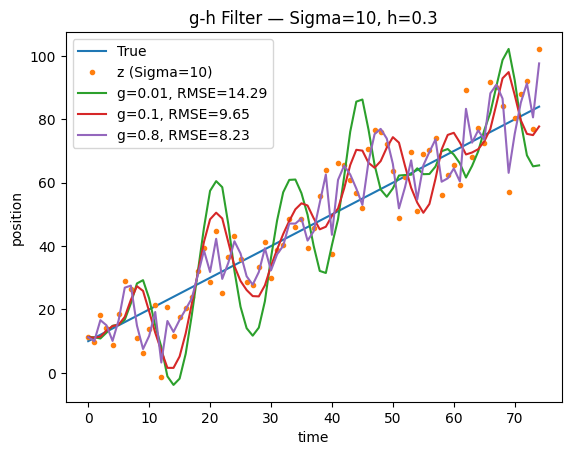

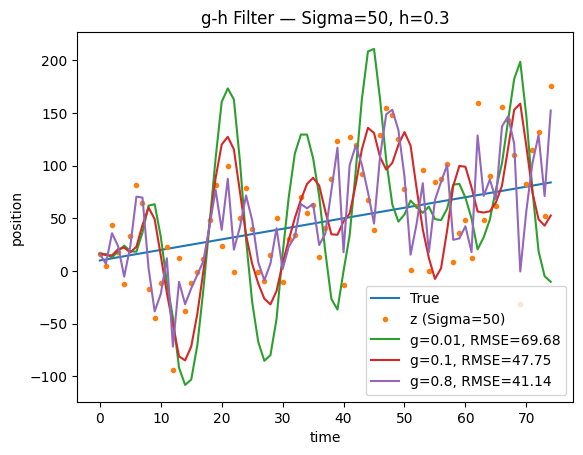

In [137]:
def gh_filter(z, x0, v0, g, h, dt):
    N = len(z)

    x_est = np.zeros(N)
    v_est = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0

    for k in range(1, N):

        x_pred = x_est[k-1] + v_est[k-1] * dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt
    return x_est, v_est


N = 75
dt = 1.0
t = np.arange(N)*dt
x0_truev_true = 0.0, 1.0
x_true = x0_true + v_true * t

h = 0.3
g_list = [0.01, 0.1, 0.8]
sigmas = [10.0, 50.0]   # light vs heavy noise

def RMSE(a, b):
    return np.sqrt(np.mean((a-b)**2))

def run_sigma(sigma, seed=0):
    rng = np.random.default_rng(seed)
    z = x_true + rng.normal(0, sigma, size=N)
    rows = []
    for g in g_list:
        x_est, v_est = gh_filter(z, x0=z[0], v0=0.0, g=g, h=h, dt=dt)
        rmse = RMSE(x_est, x_true)
        rows.append((g, rmse, x_est, z))
    return rows

for sigma in sigmas:
    results = run_sigma(sigma, seed=0)
    print(f"Sigma_z = {sigma:.0f}, h = {h}")
    for g, rmse, _, _ in results:
        print(f"  g = {g:>4}  ->  RMSE = {rmse:.3f}")


for sigma in sigmas:
    results = run_sigma(sigma, seed=0)
    plt.figure()
    plt.plot(t, x_true, label="True")
    plt.plot(t, results[0][3], ".", label=f"z (Sigma={sigma:.0f})")
    for g, rmse, x_est, _ in results:
        plt.plot(t, x_est, label=f"g={g}, RMSE={rmse:.2f}")
    plt.xlabel("time")
    plt.ylabel("position")
    plt.title(f"g-h Filter — Sigma={sigma:.0f}, h={h}")
    plt.legend()
    plt.show()

### Question 6

In this question, we will investigate the role of the gain parameter h in the g-h filter. We will run the filter with different h values while keeping the initial velocity guess constant. The goal is to observe how the choice of h affects the filter's ability to estimate the true position of the object, especially when the initial velocity guess is poor. We will evaluate the filter's performance using Root Mean Square Error (RMSE) and plot the results for comparison.

In this case, we are analyzing the effect of h parameter on the g-h filter performance when we have a bad initial velocity guess. We are running the filter for three different scenarios: good initial velocity guess (v0=0.1) with h=0.05, bad initial velocity guess (v0=3.0) with h=0.05, and bad initial velocity guess (v0=3.0) with h=0.5. The g value is kept constant at 0.4 for all cases. After running the filter for each scenario, we are calculating the RMSE to evaluate the performance.

Conclusion: In the g-h filter, the gain parameter h influences the filter's responsiveness to changes in velocity. When the initial velocity guess is poor, a smaller h value allows the filter to adjust more gradually, leading to better convergence to the true state. Conversely, a larger h value can cause the filter to react too aggressively to measurement errors, resulting in higher RMSE. The analysis shows that with a bad initial velocity guess, using a smaller h (e.g., 0.05) yields significantly better performance compared to a larger h (e.g., 0.5). Therefore, careful tuning of h is essential, especially when initial conditions are not ideal.

RMSE (doğru v0,  h=0.05): 1.227
RMSE (kötü  v0,  h=0.05): 1.787
RMSE (kötü  v0,  h=0.5 ): 1.827


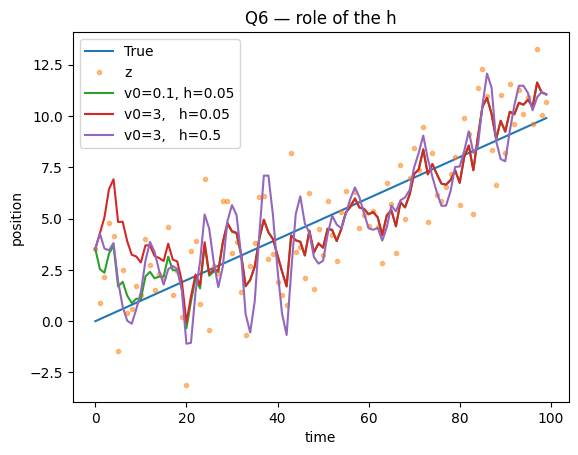

In [139]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x = np.zeros(N)
    v = np.zeros(N)

    x[0], v[0] = x0, v0

    for k in range(1, N):
        x_pred = x[k-1] + v[k-1]*dt
        v_pred = v[k-1]

        r = z[k] - x_pred

        x[k] = x_pred + g * r
        v[k] = v_pred + (h * r) / dt
    return x

np.random.seed(0)
N, dt = 100, 1.0
v_true, x0_true = 0.1, 0.0
t = np.arange(N)*dt
x_true = x0_true + v_true*t
sigma = 2.0
z = x_true + np.random.normal(0, sigma, size=N)

g = 0.4

# Üç durum
x_good  = gh_filters(z, x0=z[0], v0=0.1, g=g, h=0.05, dt=dt)  # doğru hız başlangıcı
x_poor  = gh_filters(z, x0=z[0], v0=3.0, g=g, h=0.05, dt=dt)  # kötü hız, küçük h
x_poorH = gh_filters(z, x0=z[0], v0=3.0, g=g, h=0.5,  dt=dt)  # kötü hız, büyük h

rmse = lambda x: np.sqrt(np.mean((x - x_true)**2))
print(f"RMSE (doğru v0,  h=0.05): {rmse(x_good):.3f}")
print(f"RMSE (kötü  v0,  h=0.05): {rmse(x_poor):.3f}")
print(f"RMSE (kötü  v0,  h=0.5 ): {rmse(x_poorH):.3f}")


plt.plot(t, x_true, label="True")
plt.plot(t, z, ".", alpha=0.5, label="z")
plt.plot(t, x_good,  label="v0=0.1, h=0.05")
plt.plot(t, x_poor,  label="v0=3,   h=0.05")
plt.plot(t, x_poorH, label="v0=3,   h=0.5")
plt.legend()
plt.xlabel("time")
plt.ylabel("position")
plt.title("Q6 — role of the h")
plt.show()